In [21]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm



In [40]:
dftrain=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Train_round1.csv')
dftest=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Test_round1.csv',low_memory=False)

In [41]:

model = sm.logit(formula='us ~ nuveen_t12m_sales_us_equity+nuveen_t12m_reds_us_equity+nuveen_t24m_netsl_int_equity+asset2p', data=dftrain).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.066029
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     us   No. Observations:                 4824
Model:                          Logit   Df Residuals:                     4819
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.2753
Time:                        19:21:23   Log-Likelihood:                -318.52
converged:                       True   LL-Null:                       -439.55
Covariance Type:            nonrobust   LLR p-value:                 3.363e-51
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.1830      0.213    -24.282      0.000

In [42]:

Xtest = dftest[['nuveen_t12m_sales_us_equity', 'asset2p', 'nuveen_t12m_reds_us_equity', 'nuveen_t24m_netsl_int_equity']]
ytest = dftest['us']
  
us_yhat = model.predict(Xtest)


In [43]:
dftest['us_yhat'] = us_yhat

In [44]:
print(us_yhat)

0       0.005580
1       0.005580
2       0.005580
3       0.017043
4       0.005580
          ...   
4819    0.005580
4820    0.035261
4821    0.005580
4822    0.035261
4823    0.005580
Length: 4824, dtype: float64


In [45]:

dftest = dftest.sort_values(by = 'us_yhat', ascending = False)


In [61]:
dftest['US_Equity_Quintile'] = pd.qcut(dftest['us_yhat'], 2, labels=[i for i in range (2, 0, -1)])

In [62]:
print(dftest['US_Equity_Quintile'])

3562    1
128     1
1777    1
1429    1
3505    1
       ..
3169    2
4244    2
3007    2
1500    2
236     2
Name: US_Equity_Quintile, Length: 4824, dtype: category
Categories (2, int64): [2 < 1]


In [63]:
dftest['US_Equity_Quintile'] = dftest['US_Equity_Quintile'].astype('int')

In [64]:
dftest['US_Equity_Quintile'].value_counts().reset_index(name='count')


,index,count
0,2,3207
1,1,1617


In [32]:

buyers = pd.crosstab(dftest['US_Equity_Quintile'], dftest['us'], normalize='index')



In [65]:
print(buyers)

us                         0         1
US_Equity_Quintile                    
1                   0.950526  0.049474
2                   0.997505  0.002495


In [34]:
 dftest.groupby('US_Equity_Quintile')['nuveen_t3m_sales_us_equity'].mean()

US_Equity_Quintile
1    1707.714737
2      61.285245
Name: nuveen_t3m_sales_us_equity, dtype: float64

In [66]:
dftest['US_Equity_Quintile'] = dftest['US_Equity_Quintile'].replace([1], 3)
dftest['US_Equity_Quintile'] = dftest['US_Equity_Quintile'].replace([2], 4)

<AxesSubplot:title={'center':'Proportion of Advisors Buying 2+ Asset Classes and Buying US Equity'}, xlabel='US_Equity_Quintile'>

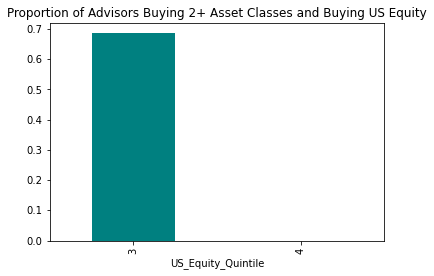

In [70]:
dftest.groupby(by = "US_Equity_Quintile")['asset2p'].mean().plot(kind = "bar", title="Proportion of Advisors Buying 2+ Asset Classes and Buying US Equity", color='teal')


<AxesSubplot:title={'center':'Net Sales of International Equity by Model Group for US Equity Sales'}, xlabel='US_Equity_Quintile'>

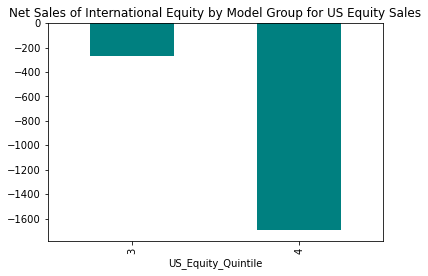

In [69]:
dftest.groupby(by = "US_Equity_Quintile")['nuveen_t24m_netsl_int_equity'].mean().plot(kind = "bar", title="Net Sales of International Equity by Model Group for US Equity Sales", color='teal')


In [38]:
dftest.to_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/US_WF_Test_round1.csv')